In [1]:
import datetime as dt
import numpy as np
import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
from functions import train_val_split

In [3]:
merged_train_all = train_val_split()[0]
merged_test_all = train_val_split()[1]

In [4]:
merged_train_all = merged_train_all.set_index(pd.DatetimeIndex(merged_train_all['Date']))
merged_test_all =  merged_test_all.set_index(pd.DatetimeIndex(merged_test_all['Date']))

In [5]:
merged_train_all = merged_train_all.drop(columns=['Date'])
merged_test_all =  merged_test_all.drop(columns=['Date'])

In [6]:
mask_0_sales_train = merged_train_all.loc[:, 'Sales'] != 0
mask_0_sales_test = merged_test_all.loc[:, 'Sales'] != 0
merged_train_all = merged_train_all.loc[mask_0_sales_train, :]
merged_test_all = merged_test_all.loc[mask_0_sales_test, :]

In [7]:
merged_train_all.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,17.0,2.0,NaN,0.0,0.0,0.0,a,1.0,a,a,50.0,12.0,2005.0,1.0,26.0,2010.0,"Jan,Apr,Jul,Oct"
2013-01-01,85.0,2.0,4220.0,619.0,1.0,NaN,a,1.0,b,a,1870.0,10.0,2011.0,0.0,NaN,NaN,NaN
2013-01-01,91.0,2.0,NaN,0.0,0.0,0.0,a,1.0,c,a,2410.0,NaN,NaN,1.0,35.0,2011.0,"Jan,Apr,Jul,Oct"
2013-01-01,103.0,2.0,NaN,0.0,0.0,0.0,a,1.0,d,c,5210.0,5.0,2015.0,0.0,NaN,NaN,NaN
2013-01-01,163.0,2.0,NaN,0.0,0.0,0.0,a,1.0,a,a,1480.0,4.0,2009.0,0.0,NaN,NaN,NaN


In [8]:
merged_train_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 368820 entries, 2013-01-01 to 2014-01-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      357676 non-null  float64
 1   DayOfWeek                  357708 non-null  float64
 2   Sales                      355654 non-null  float64
 3   Customers                  357673 non-null  float64
 4   Open                       357718 non-null  float64
 5   Promo                      357836 non-null  float64
 6   StateHoliday               357590 non-null  object 
 7   SchoolHoliday              357529 non-null  float64
 8   StoreType                  357676 non-null  object 
 9   Assortment                 357676 non-null  object 
 10  CompetitionDistance        356723 non-null  float64
 11  CompetitionOpenSinceMonth  244022 non-null  float64
 12  CompetitionOpenSinceYear   244022 non-null  float64
 13  Promo2       

In [9]:
merged_train_all.describe(include='all')

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,357676.000000,357708.000000,355654.000000,357673.000000,357718.000000,357836.000000,357590,357529.000000,357676,357676,356723.000000,244022.000000,244022.000000,357676.000000,182667.000000,182667.000000,182667
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,NaN,NaN,NaN,NaN,356852,NaN,192901,189824,NaN,NaN,NaN,NaN,NaN,NaN,107175
mean,558.063588,3.542711,6792.535594,750.984550,0.994057,0.428199,NaN,0.198199,NaN,NaN,5427.730508,7.229147,2008.669608,0.510705,23.592466,2011.763170,NaN
std,321.643593,1.735912,3095.975106,403.870381,0.076863,0.494818,NaN,0.398644,NaN,NaN,7739.650906,3.208693,6.199502,0.499886,14.133603,1.671802,NaN
min,1.000000,1.000000,133.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,280.000000,2.000000,4709.250000,507.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.000000,4.000000,6198.500000,666.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,2320.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.000000,5.000000,8162.000000,885.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


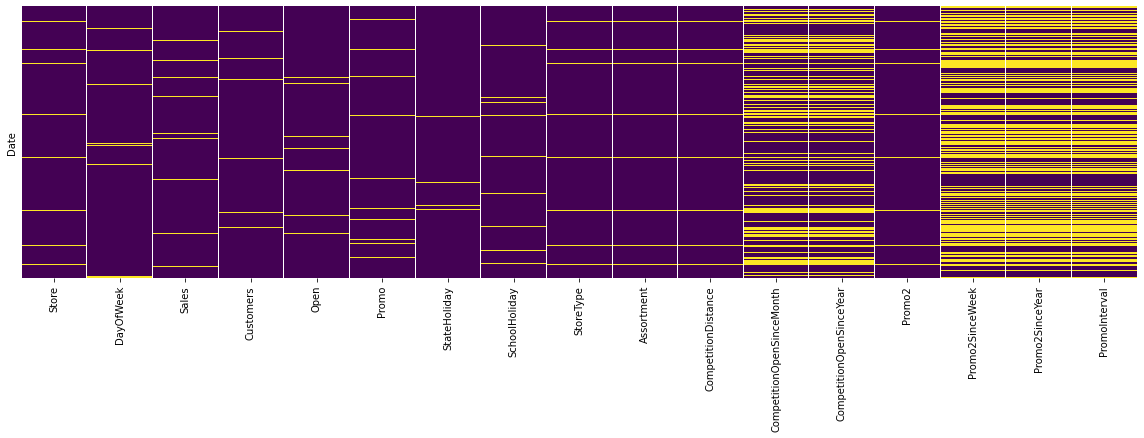

In [10]:
plt.figure(figsize=(20,5))
sns.heatmap(merged_train_all.isnull(),yticklabels=False,cbar=False,cmap='viridis')

For the sake of being able to create the models, rows with n/a values are dropped.Not whole columns, so that the total number of features is kept.

In [11]:
merged_train_clean = merged_train_all.dropna(axis=0)
merged_test_clean = merged_test_all.dropna(axis=0)

In [12]:
merged_train_clean.describe(include='all')

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,93662.000000,93662.000000,93662.000000,93662.000000,93662.0,93662.000000,93662,93662.000000,93662,93662,93662.000000,93662.000000,93662.000000,93662.0,93662.000000,93662.000000,93662
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,NaN,NaN,NaN,NaN,93614,NaN,51290,55290,NaN,NaN,NaN,NaN,NaN,NaN,58445
mean,560.440509,3.519058,6417.187739,669.728332,1.0,0.430933,NaN,0.196227,NaN,NaN,4257.914095,7.186746,2008.175802,1.0,22.523329,2011.870236,NaN
std,326.506403,1.715751,2712.295487,292.233068,0.0,0.495209,NaN,0.397144,NaN,NaN,5227.790397,3.249662,7.709788,0.0,13.601905,1.684639,NaN
min,2.000000,1.000000,297.000000,36.000000,1.0,0.000000,NaN,0.000000,NaN,NaN,40.000000,1.000000,1900.000000,1.0,1.000000,2009.000000,NaN
25%,276.000000,2.000000,4534.000000,472.000000,1.0,0.000000,NaN,0.000000,NaN,NaN,600.000000,4.000000,2005.000000,1.0,13.000000,2011.000000,NaN
50%,571.000000,4.000000,5946.000000,611.000000,1.0,0.000000,NaN,0.000000,NaN,NaN,2230.000000,7.000000,2009.000000,1.0,18.000000,2012.000000,NaN
75%,846.000000,5.000000,7777.000000,798.000000,1.0,1.000000,NaN,0.000000,NaN,NaN,5390.000000,10.000000,2012.000000,1.0,37.000000,2013.000000,NaN


In [13]:
#merged_train_clean.loc[:, 'Date'] = merged_train_clean.loc[:, 'Date'].map(dt.datetime.toordinal)
#merged_test_clean.loc[:, 'Date'] = merged_test_clean.loc[:, 'Date'].map(dt.datetime.toordinal)

In [14]:
merged_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93662 entries, 2013-01-02 to 2014-01-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      93662 non-null  float64
 1   DayOfWeek                  93662 non-null  float64
 2   Sales                      93662 non-null  float64
 3   Customers                  93662 non-null  float64
 4   Open                       93662 non-null  float64
 5   Promo                      93662 non-null  float64
 6   StateHoliday               93662 non-null  object 
 7   SchoolHoliday              93662 non-null  float64
 8   StoreType                  93662 non-null  object 
 9   Assortment                 93662 non-null  object 
 10  CompetitionDistance        93662 non-null  float64
 11  CompetitionOpenSinceMonth  93662 non-null  float64
 12  CompetitionOpenSinceYear   93662 non-null  float64
 13  Promo2                     93

For testing purposes dropping all columns that are not numerical

In [15]:
num_cols_train = merged_train_clean.columns[merged_train_clean.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols_test = merged_test_clean.columns[merged_test_clean.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

In [16]:
merged_train_clean = merged_train_clean[num_cols_train] 
merged_test_clean = merged_test_clean[num_cols_test] 

In [17]:
merged_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93662 entries, 2013-01-02 to 2014-01-31
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      93662 non-null  float64
 1   DayOfWeek                  93662 non-null  float64
 2   Sales                      93662 non-null  float64
 3   Customers                  93662 non-null  float64
 4   Open                       93662 non-null  float64
 5   Promo                      93662 non-null  float64
 6   SchoolHoliday              93662 non-null  float64
 7   CompetitionDistance        93662 non-null  float64
 8   CompetitionOpenSinceMonth  93662 non-null  float64
 9   CompetitionOpenSinceYear   93662 non-null  float64
 10  Promo2                     93662 non-null  float64
 11  Promo2SinceWeek            93662 non-null  float64
 12  Promo2SinceYear            93662 non-null  float64
dtypes: float64(13)
memory usage: 

# RMSPE

In [18]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

# Per Store

In [19]:
merged_train_unique = merged_train_clean.loc[:, 'Store'].unique()
merged_test_unique = merged_test_clean.loc[:, 'Store'].unique()

In [20]:
merged_train_dic = {}
for store in merged_train_unique:
    merged_train_dic[store] = pd.DataFrame(data=merged_train_clean[merged_train_clean.loc[:, 'Store']==store])

In [21]:
merged_test_dic = {}
for store in merged_test_unique:
    merged_test_dic[store] = pd.DataFrame(data=merged_test_clean[merged_test_clean.loc[:, 'Store']==store])

# Baseline Model

In [22]:
forecast_all_base = pd.DataFrame() 

for store, df in merged_train_dic.items():
    forecast_tmp_base = merged_train_dic[store].loc[:, 'Sales'].to_frame()
    
    forecast_tmp_base['sales_predicted'] = forecast_tmp_base.loc[:, 'Sales'].mean()
    forecast_tmp_base['store'] = store
    forecast_all_base = pd.concat((forecast_all_base, forecast_tmp_base))

print('The metric for the baseline model is {:.2f}'.format(metric(np.array(forecast_all_base.loc[:, 'sales_predicted']), 
                                                              np.array(forecast_all_base.loc[:, 'Sales']))))

The metric for the baseline model is 37.02


# Random Forest

In [23]:
#predictor_variables = [c for c in merged_df.columns]
#print(f"{store} y_train shape is {np.array(y_train.loc[:, 'Sales']).ravel().shape}")
#print(f"{store} Sales shape is {np.array(forecast_tmp_rf.loc[:, 'Sales']).shape}")
#print(f"{store} x_train shape is {np.array(x_train.shape)}")
#print(f"{store} scaled_x_train shape is {np.array(scaled_x_train.shape)}")
#print(f"{store} sales_predicted shape is {np.array(forecast_tmp_rf.loc[:, 'sales_predicted']).shape}")

In [24]:
from sklearn.model_selection import GridSearchCV

forecast_all_rf = pd.DataFrame() 
for store, df in merged_train_dic.items():
    X_train = merged_train_dic[store].drop(columns=['Sales'])
    y_train = merged_train_dic[store].loc[:, 'Sales'].to_frame()
    X_test = merged_test_dic[store].drop(columns=['Sales'])
    y_test = merged_test_dic[store].loc[:, 'Sales'].to_frame()
    
    
    rf_grid = RandomForestRegressor(random_state = 42, criterion='mse')
    grid_search = GridSearchCV(rf, 
                           param_grid = {
                                       "bootstrap": [False],
                                       "n_estimators": [500, 1000],
                                       #"min_samples_leaf": [1, 3, 5, 10, 25,100],
                                       "max_features": [1,0.5,'log2','sqrt',None],
                                       "max_depth": [80, 90, 100, 110]
                                       },
                           n_jobs = 1,
                           cv = 3,
                           return_train_score = False)
    grid_search.fit(X_train, np.ravel(y_train))

    best_grid = grid_search.best_estimator_
    #grid_accuracy = evaluate(best_grid, X_test, y_test)

    
    #rf = RandomForestRegressor(bootstrap=False, random_state = 42)
    #rf.fit(x_train,np.ravel(y_train))

    forecast_tmp_rf = y_test
    #forecast_tmp_rf['sales_predicted'] = rf.predict(x_test)
    forecast_tmp_rf['sales_predicted'] = best_grid.predict(X_test)
    forecast_tmp_rf['store'] = store
    forecast_all_rf = pd.concat((forecast_all_rf, forecast_tmp_rf))
    
    # calculate model R2 per store
    #print('- STORE', store, '- \n Random Forest Regressor controlled for %4.1f %% of the variance in the performance measure.' % (100*rf.score(x_train,y_train)))
    

    
print('The metric for the Random Forest model is {:.2f}'.format(metric(np.array(forecast_all_rf.loc[:, 'sales_predicted']), 
                                                              np.array(forecast_all_rf.loc[:, 'Sales']))))

In [25]:
X_train = merged_train_dic[store].drop(columns=['Sales'])
y_train = merged_train_dic[store].loc[:, 'Sales'].to_frame()
X_test = merged_test_dic[store].drop(columns=['Sales'])
y_test = merged_test_dic[store].loc[:, 'Sales'].to_frame()
    
    
rf_grid = RandomForestRegressor(random_state = 42, criterion='mse')
grid_search = GridSearchCV(rf_grid, 
                        param_grid = {
                                     "bootstrap": [False],
                                       "n_estimators": [500, 1000],
                                       #"min_samples_leaf": [1, 3, 5, 10, 25,100],
                                       "max_features": [1,0.5,'log2','sqrt',None],
                                       "max_depth": [80, 90, 100, 110]
                                       },
                           n_jobs = -1,
                           cv = 3,
                           return_train_score = False)
grid_search.fit(X_train, np.ravel(y_train))

best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, X_test, y_test)

    
#rf = RandomForestRegressor(bootstrap=False, random_state = 42)
#rf.fit(x_train,np.ravel(y_train))

forecast_all_rf = y_test
forecast_all_rf['sales_predicted'] = best_grid.predict(X_test)
forecast_all_rf['store'] = store
    
# calculate model R2 per store
#print('- STORE', store, '- \n Random Forest Regressor controlled for %4.1f %% of the variance in the performance measure.' % (100*rf.score(x_train,y_train)))
    

    
print('The RMSPE for the model is {:.2f}'.format(metric(np.array(forecast_all_rf.loc[:, 'sales_predicted']), 
                                                              np.array(forecast_all_rf.loc[:, 'Sales']))))
print('The R2 is {:%}'.format(best_grid.score(X_train, y_train)))
print('Best model parameters {}'.format(best_grid.score))

The RMSPE for the model is 6.81
The R2 is 99.811480%
Best model parameters <bound method RegressorMixin.score of RandomForestRegressor(bootstrap=False, max_depth=80, max_features=0.5,
                      n_estimators=1000, random_state=42)>


In [26]:
forecast_all_rf.head()

,Sales,sales_predicted,store
Date,,,
2014-02-01,5031.0,4836.000,542.0
2014-02-03,9108.0,8630.470,542.0
2014-02-04,8207.0,7911.498,542.0
2014-02-05,7053.0,7004.346,542.0
2014-02-06,7203.0,6761.414,542.0


In [27]:
#df_all = merged_train_clean.merge(forecast_all_rf)
#df_all.head()
#df_all.groupby('Date').sum()[['Sales', 'sales_predicted']].plot(figsize=(15,5))

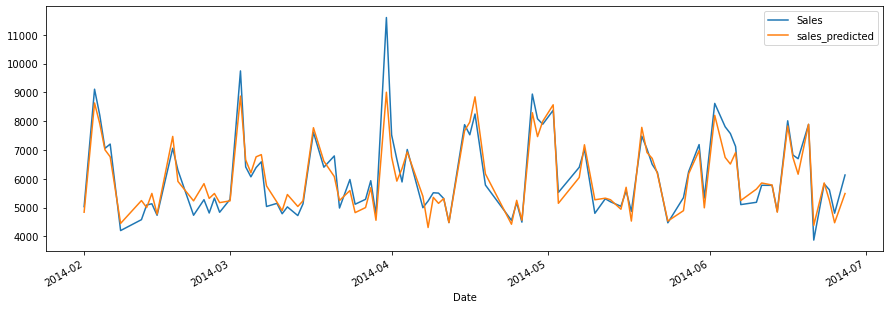

In [28]:
forecast_all_rf.groupby('Date').sum()[['Sales', 'sales_predicted']].plot(figsize=(15,5))